In [33]:
# Dependencies
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Import csv
datafile = "Resources/IowaCleanDataEXP.csv"
df = pd.read_csv(datafile)
df.head()


,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Screen Porch,Pool Area,SalePrice
0,8,603.0,1416.0,1650.0,1690,1589,3279,3,1,12,1,3.0,841.0,210,0,538000
1,9,350.0,1445.0,1856.0,1856,0,1856,1,1,8,1,3.0,834.0,0,0,394432
2,9,162.0,0.0,1590.0,1627,707,2334,2,1,10,1,3.0,751.0,0,0,376162
3,9,450.0,1646.0,1930.0,1940,0,1940,2,1,8,1,3.0,606.0,0,0,395192
4,9,760.0,2188.0,2330.0,2364,0,2364,2,1,11,2,3.0,820.0,0,0,611657


In [35]:
df.columns

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Screen Porch', 'Pool Area', 'SalePrice'],
      dtype='object')

In [36]:
# Split into train/test
X = df[['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1','Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Screen Porch', 'Pool Area']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89, 15), (30, 15), (89,), (30,))

In [37]:
# Multiple Linear Regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test, predictions)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2006531363.6130946, R2: 0.6475080735509715


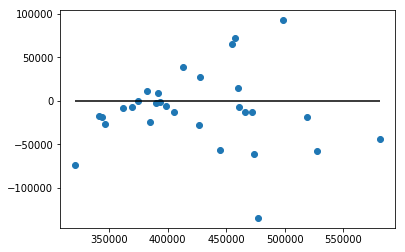

In [38]:
# Multiple Linear Regression model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/Multiple Linear Regression-EXP')

plt.show()

In [39]:
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")

# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

# plt.legend()

# plt.hlines(y=0, xmin=y.min(), xmax=y.max())

# plt.title("Residual Plot")


In [40]:
# Ridge model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = ridge.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2005895552.772838, R2: 0.6476197678867808


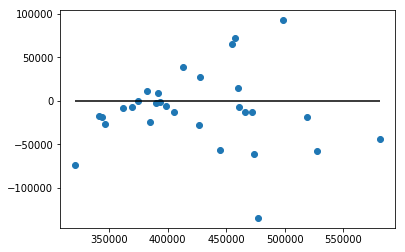

In [41]:
# Ridge model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/Ridge-EXP')

plt.show()

In [42]:
# LASSO model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = lasso.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2006697432.7070885, R2: 0.6474788998156753


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


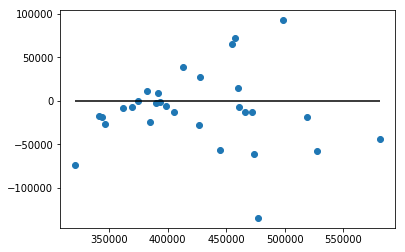

In [43]:
# LASSO model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/LASSO-EXP')

plt.show()

In [44]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = elasticnet.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1980920947.571209, R2: 0.652007113561744


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


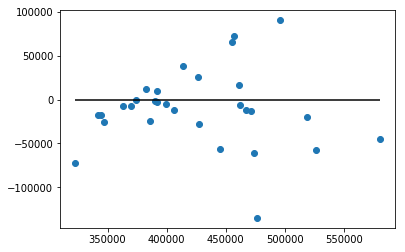

In [45]:
# ElasticNet model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/ElasticNet-EXP')

plt.show()